In [2]:
!pip install deslib

     |████████████████████████████████| 163kB 16.1MB/s 


In [3]:
import pandas as pd
import numpy as np
from numpy import dstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from deslib.static import StackedClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from os import makedirs
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carregando o dataset
df = pd.read_excel("https://raw.githubusercontent.com/irvin-s/smd_project/main/dataset/dry_bean_dataset.xls")

In [5]:
# Atribuindo os labels para a classe reposta
labels = ["Barbunya", "Bombay", "Cali", "Dermason", "Horoz", "Seker", "Sira"]

# Dividindo a base em treino e teste
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.33, random_state=123)

# Normalizando os dados
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.fit_transform(X_test)

# Transformando a variável cartegorica em binária
labelencoder = LabelEncoder()
y_train_bin = labelencoder.fit_transform(y_train)
y_test_bin = labelencoder.fit_transform(y_test)

Matriz Confusa KNN: 
[[ 389    0   29    0    1    4   14]
 [   0  172    0    0    0    0    0]
 [  14    0  507    0   10    1    6]
 [   0    0    0 1072    1   20   77]
 [   1    0    8    4  602    0   21]
 [   6    0    0    9    0  627   27]
 [   2    0    2   79   10    9  768]] 

Boxplot KNN: 


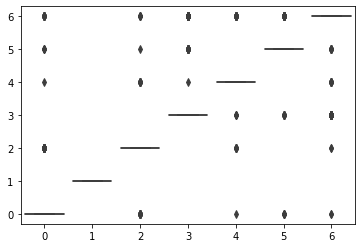



Relatório de classificação KNN: 
               precision    recall  f1-score   support

    Barbunya       0.94      0.89      0.92       437
      Bombay       1.00      1.00      1.00       172
        Cali       0.93      0.94      0.94       538
    Dermason       0.92      0.92      0.92      1170
       Horoz       0.96      0.95      0.96       636
       Seker       0.95      0.94      0.94       669
        Sira       0.84      0.88      0.86       870

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Acurácia KNN(Holdout): 92.10%
Acurácia média KNN(k-fold): 91.85% e desvio padrão 0.01096965867903345


In [6]:
# Aplicando o modelo KNN

# Definindo o valor de vizinhos
classifier = KNeighborsClassifier(n_neighbors=15)

# Treinar o modelo, com os dados de treinamento
classifier.fit(X_train_norm, y_train_bin)

# Prever os valores de y com dos dados de X_test
y_pred = classifier.predict(X_test_norm)

# Imprimindo a matriz confusa
print("Matriz Confusa KNN: ")
print(confusion_matrix(y_test_bin, y_pred), "\n")  

# Imprimindo o gráfico de caixa
print("Boxplot KNN: ")
sns.boxplot(x=y_test_bin,y=y_pred, data=df)
plt.show()
print("\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação KNN: \n", classification_report(y_test_bin, y_pred, target_names=labels))  

# Imprimindo o quão acurado foi o modelo
acu_knn = accuracy_score(y_test_bin, y_pred) * 100
print("Acurácia KNN(Holdout): {:.2f}%".format(acu_knn))

# Validação cruzada com k-fold e k=10
scores_knn = cross_val_score(classifier, X_test_norm, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média KNN(k-fold): {:.2f}% e desvio padrão".format(scores_knn.mean()*100), scores_knn.std())

In [7]:
# Aplicando a Árvore de decisão

# Instanciando o modelo
modeldt = DecisionTreeClassifier(max_depth=13)

# Treinar o modelo
modeldt.fit(X_train, y_train_bin)

# Aplicar o modelo ao treinamento e ao teste
predicted_test_y = modeldt.predict(X_test)

predicted_train_y = modeldt.predict(X_train)

In [8]:
# Imprimindo a matriz confusa
print("Matriz Confusa Decision Tree: ")
print(confusion_matrix(y_test_bin, predicted_test_y), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Decision Tree: \n", classification_report(y_test_bin, predicted_test_y, target_names=labels)) 

# Imprimindo a acurácia do modelo
accuracy_dt = accuracy_score(y_test_bin, predicted_test_y) * 100
print("Acurácia Decision Tree(Holdout): {:.2f}%.".format(accuracy_dt))

# Validação cruzada com k-fold e k=10
scores_dt = cross_val_score(modeldt, X_test, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média Decision Tree(k-fold): {:.2f}% e desvio padrão".format(scores_dt.mean()*100), scores_dt.std())

Matriz Confusa Decision Tree: 
[[ 395    0   24    1    1    4   12]
 [   1  170    1    0    0    0    0]
 [  30    0  482    0   20    1    5]
 [   1    0    0 1039    1   25  104]
 [   6    0    9    7  594    0   20]
 [   7    0    0   19    0  619   24]
 [   6    0    4  100   12   20  728]] 

Relatório de classificação Decision Tree: 
               precision    recall  f1-score   support

    Barbunya       0.89      0.90      0.89       437
      Bombay       1.00      0.99      0.99       172
        Cali       0.93      0.90      0.91       538
    Dermason       0.89      0.89      0.89      1170
       Horoz       0.95      0.93      0.94       636
       Seker       0.93      0.93      0.93       669
        Sira       0.82      0.84      0.83       870

    accuracy                           0.90      4492
   macro avg       0.91      0.91      0.91      4492
weighted avg       0.90      0.90      0.90      4492

Acurácia Decision Tree(Holdout): 89.65%.
Acurácia média Dec

In [9]:
# Aplicando a Random Forest

# Instanciando o modelo
rf = RandomForestClassifier(100, max_depth=13, random_state=42)
rf.fit(X_train,y_train_bin)

# Aplicando o modelo
y_pred_rf = rf.predict(X_test)

# Imprimindo a matriz confusa
print("Matriz Confusa Random Forest: ")
print(confusion_matrix(y_test_bin, y_pred_rf), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Random Forest: \n", classification_report(y_test_bin, y_pred_rf, target_names=labels)) 

# Imprimindo a acurácia do modelo
accuracy_rf = accuracy_score(y_test_bin, y_pred_rf) * 100
print("Acurácia Random Forest(Holdout): {:.2f}%.".format(accuracy_rf))

# Validação cruzada com k-fold e k=10
scores_rf = cross_val_score(rf, X_test, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia médiaRandom Forest(k-fold): {:.2f}% e desvio padrão".format(scores_rf.mean()*100), scores_rf.std())

Matriz Confusa Random Forest: 
[[ 396    0   24    0    1    4   12]
 [   2  170    0    0    0    0    0]
 [  19    0  497    0   14    1    7]
 [   0    0    0 1082    2   19   67]
 [   1    0    8    5  602    0   20]
 [   3    0    0   15    0  634   17]
 [   3    0    2   90    8   17  750]] 

Relatório de classificação Random Forest: 
               precision    recall  f1-score   support

    Barbunya       0.93      0.91      0.92       437
      Bombay       1.00      0.99      0.99       172
        Cali       0.94      0.92      0.93       538
    Dermason       0.91      0.92      0.92      1170
       Horoz       0.96      0.95      0.95       636
       Seker       0.94      0.95      0.94       669
        Sira       0.86      0.86      0.86       870

    accuracy                           0.92      4492
   macro avg       0.93      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Acurácia Random Forest(Holdout): 91.96%.
Acurácia médiaRand

In [10]:
# Aplicando a Rede Neural MLP

# Vetorizar a classe resposta
lb = LabelBinarizer()
y_train_vet = lb.fit_transform(y_train)
y_test_vet = lb.fit_transform(y_test)
 
# Instanciado o modelo
modelNN = Sequential()
modelNN.add(Dense(90, input_dim=16, activation='relu'))
modelNN.add(Dense(7, activation='softmax'))
modelNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(modelNN)
# Realizando o treinamento
modelNN.fit(X_train_norm, y_train_vet, batch_size=128, epochs=500, verbose=0, validation_data=(X_test_norm, y_test_vet))

def model_NN_K():
  # Instanciado o modelo
  modelNN_K = Sequential()
  modelNN_K.add(Dense(90, input_dim=16, activation='relu'))
  modelNN_K.add(Dense(7, activation='softmax'))
  modelNN_K.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return modelNN_K

# Cria o modelo K
modelNN_K = KerasClassifier(build_fn=model_NN_K, nb_epoch=500, batch_size=128, verbose=0)

# Realizando o treinamento K
modelNN_K.fit(X_train_norm, y_train_vet, validation_data=(X_test_norm, y_test_vet))

# Avalidando a Rede Neural 
predictions = modelNN.predict(X_test_norm, batch_size=128)

# Imprimindo a matriz confusa
print("Matriz Confusa Rede Neural MLP: ")
print(confusion_matrix(y_test_vet.argmax(axis=1), predictions.argmax(axis=1)), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Rede Neural MLP: \n", classification_report(y_test_vet.argmax(axis=1), predictions.argmax(axis=1), target_names=labels, zero_division=0))

# Imprimindo a acurácia do modelo
accuracy_nn = accuracy_score(y_test_vet.argmax(axis=1), predictions.argmax(axis=1)) * 100
print("Acurácia Rede Neural MLP(Holdout): {:.2f}%.".format(accuracy_nn))

# Validação cruzada com k-fold e k=10
scores_nn = cross_val_score(modelNN_K, X_test_norm, y_test_vet.argmax(axis=1), cv=10, scoring='accuracy')
print("Acurácia média Rede Neural MLP(k-fold): {:.2f}% e desvio padrão".format(scores_nn.mean()*100), scores_nn.std())

Matriz Confusa Rede Neural MLP: 
[[ 403    0   18    1    2    2   11]
 [   0  172    0    0    0    0    0]
 [  16    0  501    0   12    1    8]
 [   1    0    0 1109    1   14   45]
 [   2    0    7    9  605    0   13]
 [   4    0    1   18    0  636   10]
 [   4    0    1   98   11   10  746]] 

Relatório de classificação Rede Neural MLP: 
               precision    recall  f1-score   support

    Barbunya       0.94      0.92      0.93       437
      Bombay       1.00      1.00      1.00       172
        Cali       0.95      0.93      0.94       538
    Dermason       0.90      0.95      0.92      1170
       Horoz       0.96      0.95      0.96       636
       Seker       0.96      0.95      0.95       669
        Sira       0.90      0.86      0.88       870

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Acurácia Rede Neural MLP(Holdout): 92.88%.
Acurácia méd

In [38]:
# Ensamble de Redes Neurais

# Função com o modelo
def gera_modelo(X_tr, y_tr):
  # Instanciado o modelo
  model = Sequential()
  model.add(Dense(90, input_dim=16, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  
  # Compilando o modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinando o modelo
  model.fit(X_tr, y_tr, epochs=500, batch_size=128, verbose=0)

  return model

# Diretório para armazenar cada modelo gerado
makedirs('modelos')

# Treina e salva os modelos
n_members = 5
for i in range(n_members):
	#Treina o modelo
	model = gera_modelo(X_train_norm, y_train_vet)
	#Salva o modelo
	filename = 'modelos/modelo_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Salvo %s' % filename)

>Salvo modelos/modelo_1.h5
>Salvo modelos/modelo_2.h5
>Salvo modelos/modelo_3.h5
>Salvo modelos/modelo_4.h5
>Salvo modelos/modelo_5.h5


In [39]:
# Carregar os modelos salvos
def carregar_modelos(n_models):
	all_models = list()
	for i in range(n_models):
		# Define o nome do modelo
		filename = 'modelos/modelo_' + str(i + 1) + '.h5'
		# Carrega o arquivo com o modelo
		model = load_model(filename)
		# Adicionar o modelo a uma lista
		all_models.append(model)
		print('>Carregando %s' % filename)
	return all_models

# Carregar todos os modelos
n_members = 5
members = carregar_modelos(n_members)
print('Total de modelos carregados: %d' % len(members))

>Carregando modelos/modelo_1.h5
>Carregando modelos/modelo_2.h5
>Carregando modelos/modelo_3.h5
>Carregando modelos/modelo_4.h5
>Carregando modelos/modelo_5.h5
Total de modelos carregados: 5


In [40]:
# Avaliando o desempenho individual
i = 1
for model in members:
    _, acc = model.evaluate(X_test_norm, y_test_vet, verbose=0)
    print('Acurácia modelo ' + str(i) + ': %.3f' % acc)
    i = i + 1

Acurácia modelo 1: 0.927
Acurácia modelo 2: 0.926
Acurácia modelo 3: 0.928
Acurácia modelo 4: 0.924
Acurácia modelo 5: 0.925


In [41]:
# Cria o modelo a partir dos modelos salvos e retorna um Ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# Avalia o modelo
		yhat = model.predict(inputX, verbose=0)
		# Armazena as predições [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# Aglutina as prdições [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

# Treina um modelo com base nas saídas dos membros do ensamble
def fit_stacked_model(members, inputX, inputy):
	# Cria um dataset usando o ensemble
	stackedX = stacked_dataset(members, inputX)
	# Treina o modelo
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

In [42]:
# Treina o modelo stacked utilizando o Ensemble
model = fit_stacked_model(members, X_test_norm, y_test_bin)

In [43]:
# Classifica utilizando modelo Stacked
def stacked_prediction(members, model, inputX):
	# Cria um conjunto de dados usando o Ensemble
	stackedX = stacked_dataset(members, inputX)
	# Faz a prediçãow
	yhat = model.predict(stackedX)
	return yhat

In [45]:
# Avaliando a predição realizada pelo Ensemble
yhat = stacked_prediction(members, model, X_test_norm)
acc = accuracy_score(y_test_bin, yhat)
acc = acc*100

# Imprimindo o relatório de classificação
print("Relatório de classificação Ensamble de Redes Neurais: \n", classification_report(y_test_bin, yhat, target_names=labels, zero_division=0))

# Acurácia do modelo
print('Acurácia do Ensamble de Redes Neurais(Holdout): {:.2f}%'.format(acc))

# Validação cruzada com k-fold e k=10
scores_en = cross_val_score(model, X_test_norm, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média Ensamble de Redes Neurais(k-fold): {:.2f}% e desvio padrão".format(scores_en.mean()*100), scores_en.std())

Relatório de classificação Ensamble de Redes Neurais: 
               precision    recall  f1-score   support

    Barbunya       0.94      0.93      0.93       437
      Bombay       1.00      1.00      1.00       172
        Cali       0.95      0.94      0.94       538
    Dermason       0.91      0.93      0.92      1170
       Horoz       0.96      0.95      0.96       636
       Seker       0.96      0.95      0.96       669
        Sira       0.87      0.88      0.88       870

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Acurácia do Ensamble de Redes Neurais(Holdout): 92.99%
Acurácia média Ensamble de Redes Neurais(k-fold): 92.30% e desvio padrão 0.005720070172797905


In [46]:
#Ensamble heterogêneo

rng = np.random.RandomState(42)

# KNN
classifier
# Decision Tree
modeldt
# Randon Forest
rf
# Rede Neural MLP
model

# Pool de classificadores
pool_classifiers = [classifier, modeldt, rf, modelNN_K]

# Classificadores para votação
voting_classifiers = [("knn", classifier), ("tree", modeldt), ("random forest", rf), ("perceptron", model)]

# Treinando o Classificador de votação
model_voting = VotingClassifier(estimators=voting_classifiers).fit(X_train_norm, y_train_bin)

# Treinando o meta classificador
stacked_dt = StackedClassifier(pool_classifiers, random_state=rng, meta_classifier=DecisionTreeClassifier())

# Treinando o Ensemble
stacked_dt.fit(X_test_norm, y_test_bin)

# Avaliando o Ensemble
predicted = model_voting.predict(X_test_norm)

# Imprimindo a matriz confusa
print("Matriz Confusa KNN: ")
print(confusion_matrix(y_test_bin, predicted), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Ensamble de Redes Neurais: \n", classification_report(y_test_bin, predicted, target_names=labels, zero_division=0))

# Acurácia do modelo
print('Acurácia do Ensamble Heterogêneo(Holdout): {:.2f}%'.format(model_voting.score(X_test_norm, y_test_bin)*100))

# Validação cruzada com k-fold e k=10
scores_en_et = cross_val_score(model_voting, X_test_norm, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média Ensamble Heterogêneo(k-fold): {:.2f}% e desvio padrão".format(scores_en_et.mean()*100), scores_en_et.std())

Matriz Confusa KNN: 
[[ 399    0   22    0    1    3   12]
 [   1  171    0    0    0    0    0]
 [  17    0  504    0   11    1    5]
 [   0    0    0 1089    2   18   61]
 [   2    0   10    6  606    0   12]
 [   6    0    0   12    0  633   18]
 [   3    0    2   93   14   13  745]] 

Relatório de classificação Ensamble de Redes Neurais: 
               precision    recall  f1-score   support

    Barbunya       0.93      0.91      0.92       437
      Bombay       1.00      0.99      1.00       172
        Cali       0.94      0.94      0.94       538
    Dermason       0.91      0.93      0.92      1170
       Horoz       0.96      0.95      0.95       636
       Seker       0.95      0.95      0.95       669
        Sira       0.87      0.86      0.86       870

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Acurácia do Ensamble Heterogêneo(Holdout): 92.32%
Acuráci